In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_tuned_convergence(prob, size, final_param_dict):
    fig, ax = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle(f'{prob} {size} Environment Convergence'.title(), fontsize=16)
    for i, method in enumerate(['policy_iteration', 'value_iteration', 'q_learning']):
        if method == 'q_learning':
            path = f'./results/{prob}_{size}_{method}_epsilon.csv'
        else:
            path = f'./results/{prob}_{size}_{method}.csv'
        df = pd.read_csv(path)
        query = []
        for param, val in final_param_dict[method].items():
            query.append(f'{param} == {val}')
        query = ' and '.join(query)
        x  = df.round(4).query(query).groupby('iter')['mean_value'].mean().index
        y = df.round(4).query(query).groupby('iter')['mean_value'].mean().values
        ax[i].plot(x, y)
        ax[i].set_ylabel('Mean V Value')
        ax[i].set_xlabel('Iteration')
        ax[i].set_title(method.replace('_', ' ').title())

In [3]:
def plot_QL_convergence(prob, size, param_dict):
    fig, ax = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle(f'Q-Learning {prob.replace("_", " ")} {size} Environment Convergence'.title(), fontsize=16)
    method = 'q_learning'
    for i, param in enumerate(['gamma', 'alpha', 'epsilon']):
        path = f'./results/{prob}_{size}_{method}_{param}.csv'
        df = pd.read_csv(path)
        df = df.round(7)
        if param == 'gamma':
            for v in sorted(df[param].unique()):
                v = round(v, 7)
                idx = df.query(f'{param}==@v').index
                mean_v = df.loc[idx].groupby('iter')['mean_value'].mean()
                x = mean_v.index.values
                y = mean_v.values
                ax[i].plot(x, y, label=v)
        else:
            for v1 in sorted(df[f'{param}_decay'].unique()):
                v1 = round(v1, 7)
                v2 = param_dict[param][v1]
                idx = df.query(f'{param}_decay==@v1 and {param}_min==@v2').index
                mean_v = df.loc[idx].groupby('iter')['mean_value'].mean()
                x = mean_v.index.values
                y = mean_v.values
                ax[i].plot(x, y, label=f'{v1} {v2}')
        if prob == 'Forest' and param == 'gamma':
            ax[i].set_yscale('log')
        if param == 'gamma':
            ax[i].legend(title='Gamma')
        else:
            ax[i].legend(title='Decay - Min')
        ax[i].set_ylabel('Mean V Value')
        ax[i].set_xlabel('Iteration')
        ax[i].set_title(param.title())

In [4]:
def plot_PI_convergence(prob):
    method = 'policy_iteration'
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f'{method.replace("_", " ")} {prob.replace("_", " ")} Convergence'.title(), fontsize=16)
    for i, size in enumerate(['small', 'large']):
        path = f'./results/{prob}_{size}_{method}.csv'
        df = pd.read_csv(path)
        df = df.round(6)
        for g in sorted(df['gamma'].unique()):
            g = round(g, 6)
            g_idx = df.query('gamma==@g').index
            if len(g_idx) > 100:
                scale = len(g_idx) // 100
                g_idx = g_idx[::scale]
            x = df.loc[g_idx, 'iter'].values
            y = df.loc[g_idx, 'mean_value'].values
            ax[i].plot(x, y, label=g)
        if prob == 'Forest':
            ax[i].set_yscale('log')
        ax[i].legend(title='Gamma')
        ax[i].set_ylabel('Mean V Value')
        ax[i].set_xlabel('Iteration')
        ax[i].set_title(size.title())

In [5]:
def plot_VI_convergence(prob):
    method = 'value_iteration'
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f'{method.replace("_", " ")} {prob.replace("_", " ")} Convergence'.title(), fontsize=16)
    for i, size in enumerate(['small', 'large']):
        path = f'./results/{prob}_{size}_{method}.csv'
        df = pd.read_csv(path)
        df = df.round(6)
        for g in sorted(df['gamma'].unique()):
            g = round(g, 6)
            g_idx = df.query('gamma==@g and epsilon==.01').index
            if len(g_idx) > 100:
                scale = len(g_idx) // 100
                g_idx = g_idx[::scale]
            x = df.loc[g_idx, 'iter'].values
            y = df.loc[g_idx, 'mean_value'].values
            ax[i].plot(x, y, label=g)
        if prob == 'Forest':
            ax[i].set_xscale('log')
            ax[i].set_yscale('log')
        ax[i].legend(title='Gamma')
        ax[i].set_ylabel('Mean V Value')
        ax[i].set_xlabel('Iteration')
        ax[i].set_title(size.title())

In [6]:
def plot_VI_simulations(prob):
    method = 'value_iteration'
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f'Value Iteration {prob.replace("_", " ")} Simulation Results'.title(), fontsize=16)
    for i, size in enumerate(['small', 'large']):
        df = pd.read_csv(f'./simulations/{prob}_{size}_{method}.csv')
        df = df.round(7)
        idx = df.query('epsilon == .001').index
        xlabel = size.title()
        x = range(idx.shape[0])
        y = df.loc[idx, 'avg_reward'].values
        ax[i].bar(x, y)
        ax[i].set_xticklabels([''] + df.loc[idx, 'gamma'].tolist())
        ax[i].set_ylabel('Score')
        ax[i].set_xlabel(xlabel)
        ax[i].set_title(size.title())

In [7]:
def plot_QL_simulations(prob, size, param_dict):
    
    fig, ax = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle(f'Q-Learning {prob.replace("_", " ")} {size} Environment Simulation Results'.title(), fontsize=16)
    for i, param in enumerate(['gamma', 'alpha', 'epsilon']):
        df = pd.read_csv(f'./simulations/{prob}_{size}_q_learning_{param}.csv')
        df = df.round(7)
        if param == 'gamma':
            xlabel = param.title()
            x = df.groupby(param)['avg_reward'].apply(lambda x: list(x)).index.values
            y = df.groupby(param)['avg_reward'].apply(lambda x: list(x)).values
            ax[i].boxplot(y)
        else:
            xlabel = f'{param} Decay'.title()
            idx = df[df[f'{param}_min'] == df[f'{param}_decay'].map(param_dict[param])].index
            x = df.loc[idx].groupby(f'{param}_decay')['avg_reward'].apply(lambda x: list(x)).index.values
            y = df.loc[idx].groupby(f'{param}_decay')['avg_reward'].apply(lambda x: list(x)).values
            ax[i].boxplot(y)
        ax[i].set_xticklabels(x.round(9))
        ax[i].set_ylabel('Score')
        ax[i].set_xlabel(xlabel)

In [8]:
def plot_PI_simulations(prob):
    method = 'policy_iteration'
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f'Policy Iteration {prob.replace("_", " ")} Simulation Results'.title(), fontsize=16)
    for i, size in enumerate(['small', 'large']):
        df = pd.read_csv(f'./simulations/{prob}_{size}_{method}.csv')
        df = df.round(7)
        xlabel = size.title()
        x = range(df.shape[0])
        y = df['avg_reward'].values
        ax[i].bar(x, y)
        ax[i].set_xticklabels([''] + df['gamma'].tolist())
        ax[i].set_ylabel('Score')
        ax[i].set_xlabel(xlabel)
        ax[i].set_title(size.title())

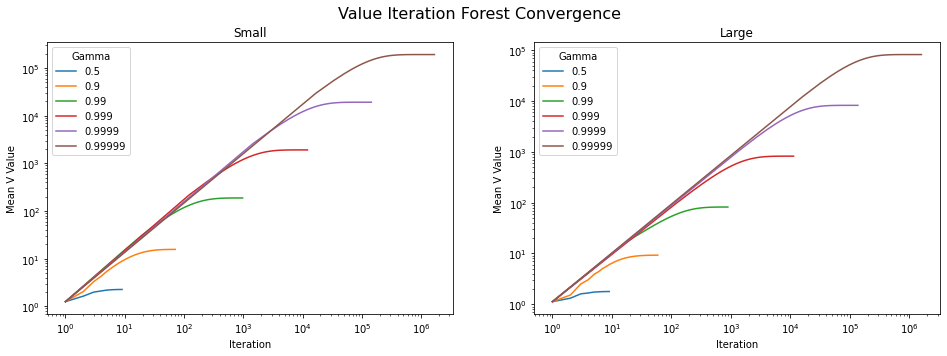

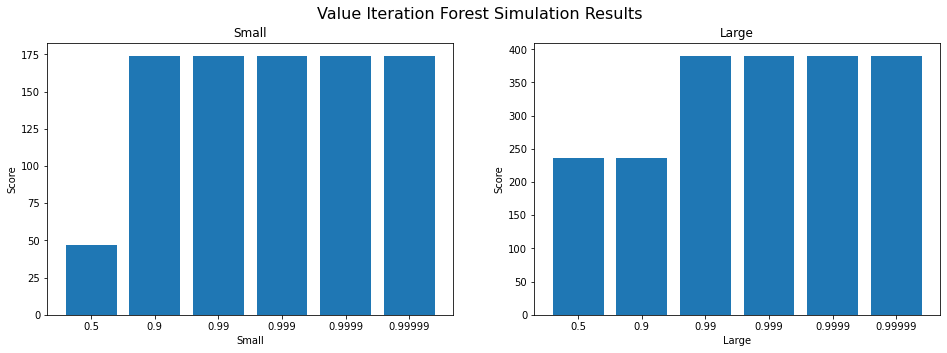

In [9]:
plot_VI_convergence('Forest')
plot_VI_simulations('Forest')

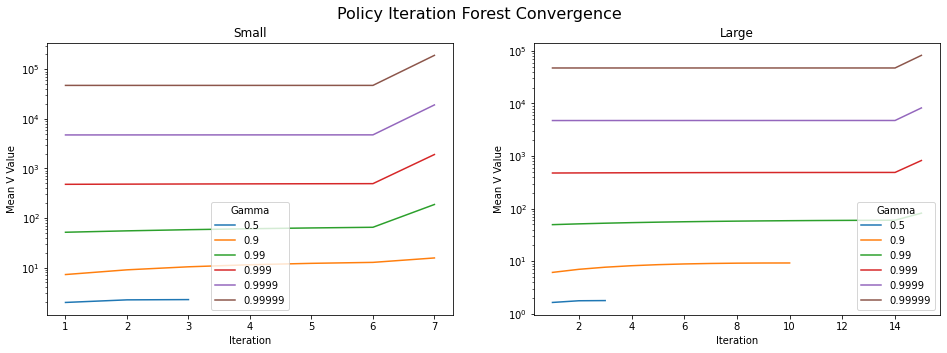

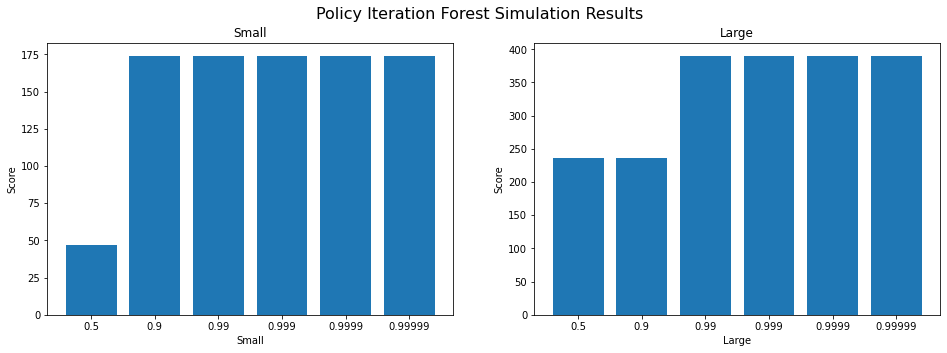

In [10]:
plot_PI_convergence('Forest')
plot_PI_simulations('Forest')

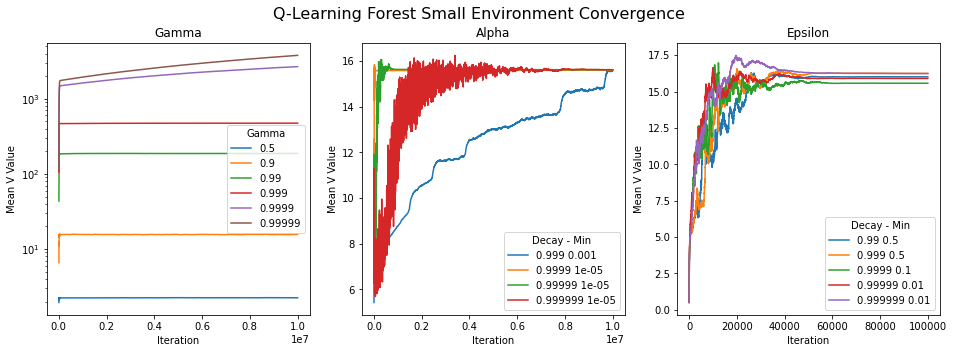

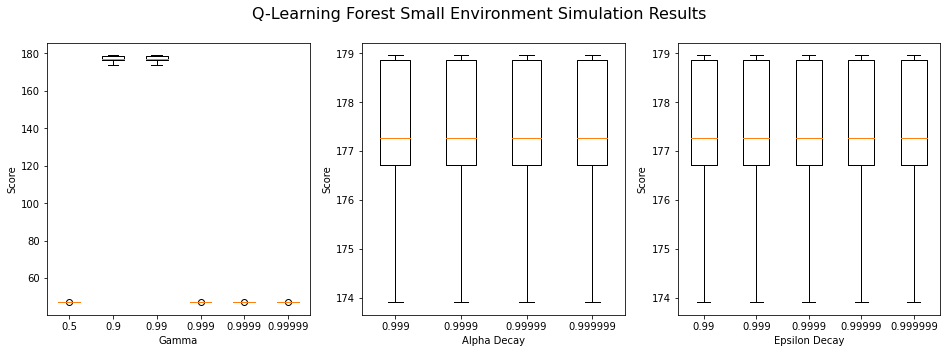

In [11]:
param_dict = {
    'alpha': {
        0.999: 0.001,
        0.9999: 1e-05,
        0.99999: 1e-05,
        0.999999: 1e-05,
    },
    'epsilon': {
        0.99: 0.5,
        0.999: 0.5,
        0.9999: 0.1,
        0.99999: 0.01,
        0.999999: 0.01,
    }
}
plot_QL_convergence('Forest', 'small', param_dict)
plot_QL_simulations('forest', 'small', param_dict)

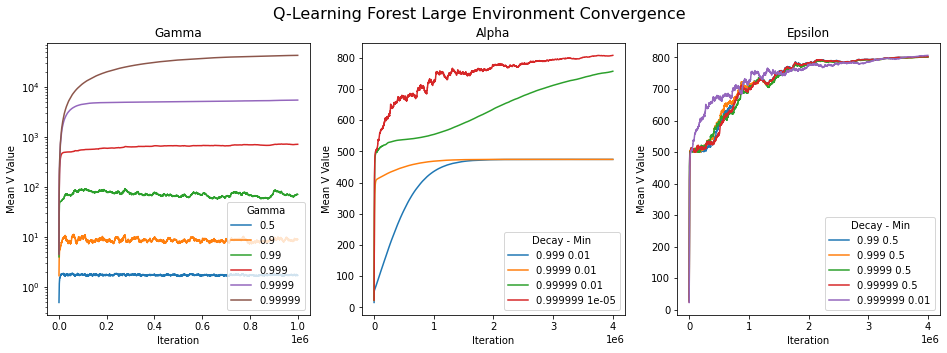

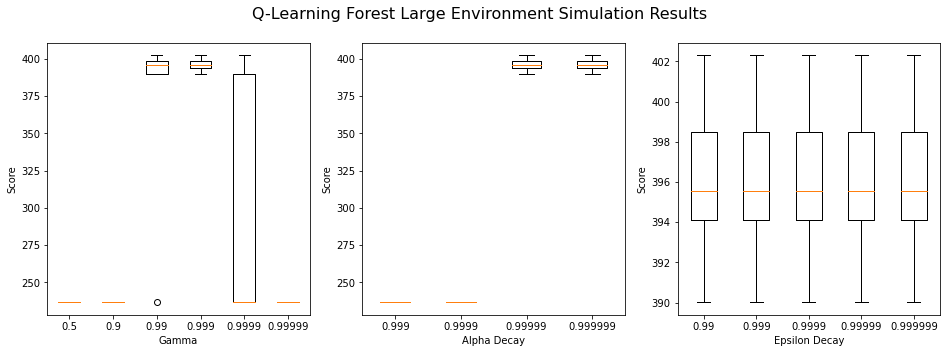

In [12]:
param_dict = {
    'alpha': {
        0.999: 0.01,
        0.9999: 0.01,
        0.99999: 0.01,
        0.999999: 1e-05,
    },
    'epsilon': {
        0.99: 0.5,
        0.999: 0.5,
        0.9999: 0.5,
        0.99999: 0.5,
        0.999999: 0.01
    }
}
plot_QL_convergence('Forest', 'large', param_dict)
plot_QL_simulations('Forest', 'large', param_dict)

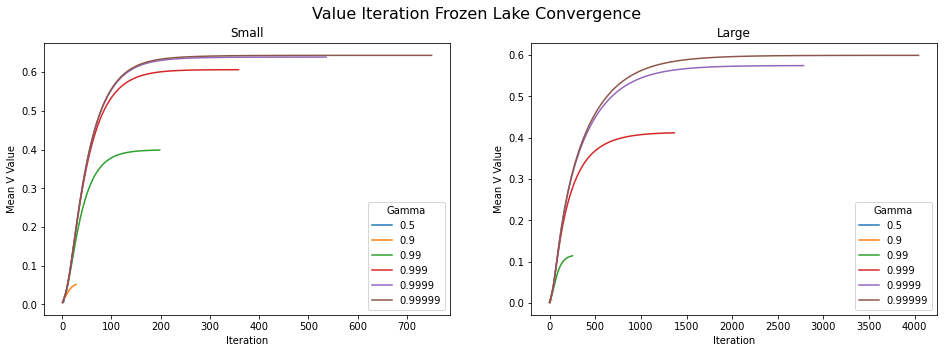

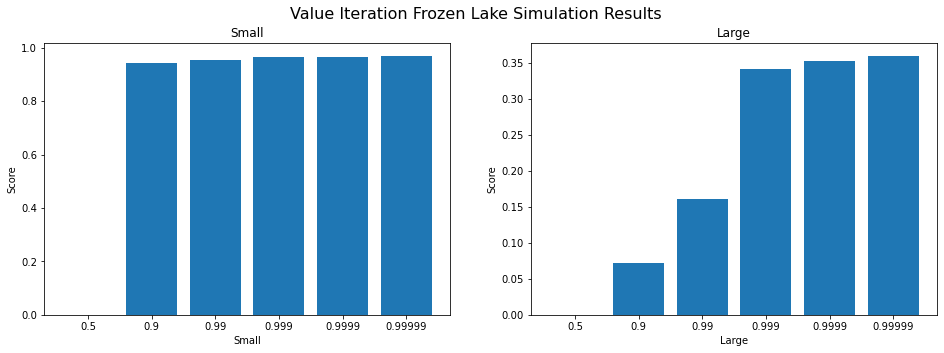

In [13]:
plot_VI_convergence('Frozen_Lake')
plot_VI_simulations('Frozen_Lake')

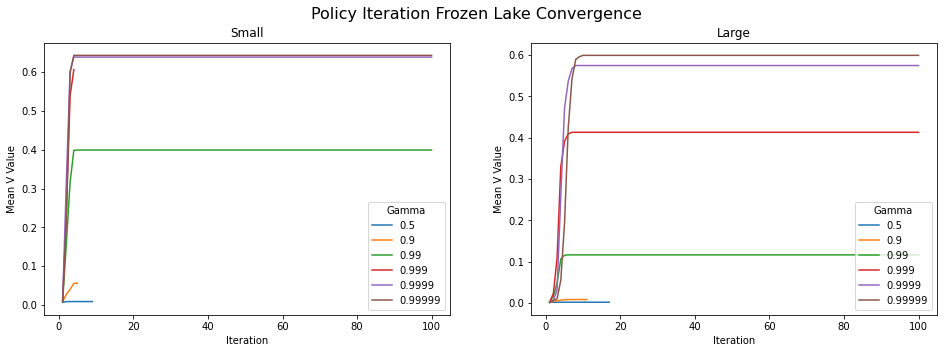

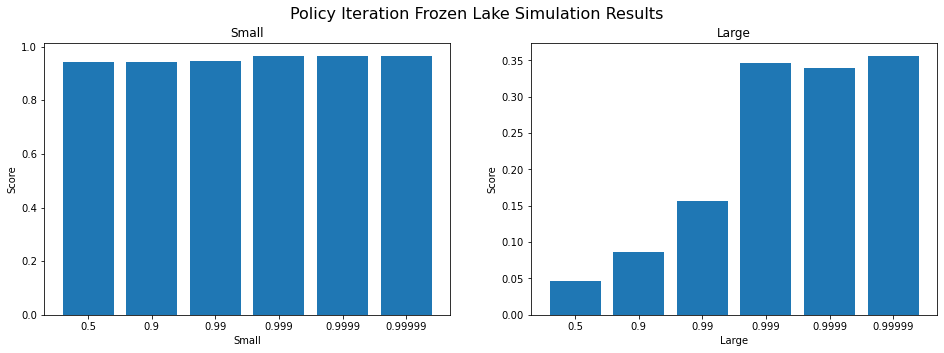

In [14]:
plot_PI_convergence('Frozen_Lake')
plot_PI_simulations('Frozen_Lake')

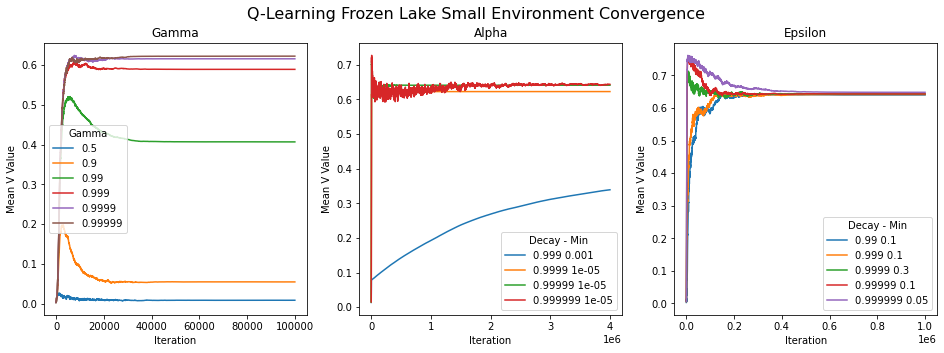

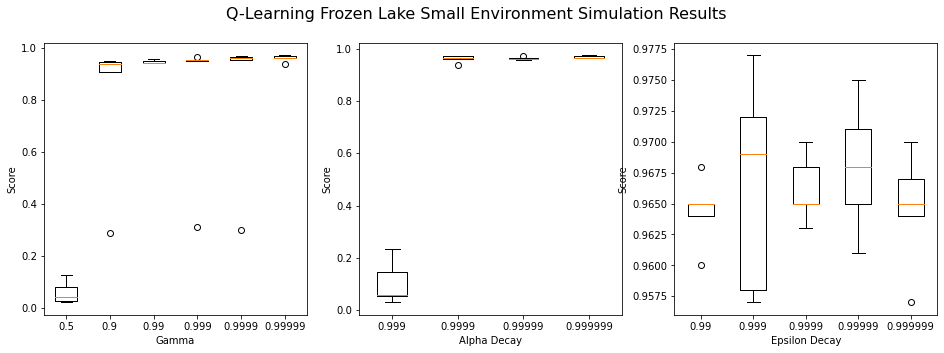

In [15]:
param_dict = {
    'alpha': {
        0.999: 0.001,
        0.9999: 1e-05,
        0.99999: 1e-05,
        0.999999: 1e-05,
    },
    'epsilon': {
        0.99: 0.1,
        0.999: 0.1,
        0.9999: 0.3,
        0.99999: 0.1,
        0.999999: 0.05,
    }
}
plot_QL_convergence('Frozen_Lake', 'small', param_dict)
plot_QL_simulations('Frozen_Lake', 'small', param_dict)

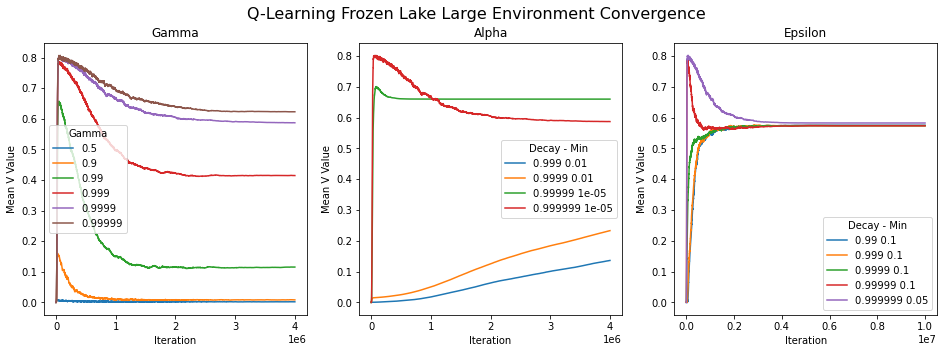

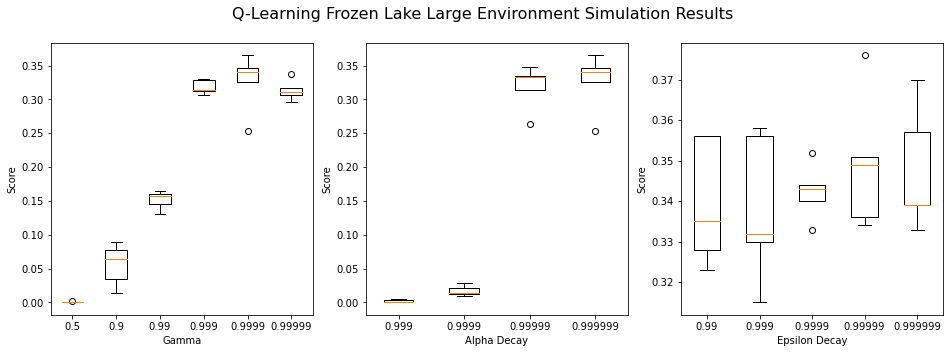

In [16]:
param_dict = {
    'alpha': {
        0.999: 0.01,
        0.9999: 0.01,
        0.99999: 1e-05,
        0.999999: 1e-05,
    },
    'epsilon': {
        0.99: 0.1,
        0.999: 0.1,
        0.9999: 0.1,
        0.99999: 0.1,
        0.999999: 0.05,
    }
}
plot_QL_convergence('Frozen_Lake', 'large', param_dict)
plot_QL_simulations('Frozen_Lake', 'large', param_dict)